In [1]:
%autosave 120
%matplotlib inline
import numpy as np
import pandas as pd
#%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets

Autosaving every 120 seconds


# Bayesian reasoning

Through these exercices, we will see how we can make probabilistic statements using the Bayes' rule. These examples will allow us to work on the concepts of prior, likelihood and posterior probabilities.

## Exercise 1 (Bayesian Data Analysis, Gelman et al, Chapter 1)

Humans male have one X-chromosome and one Y-chromosome, wheras females have two X-chromosomes, each chromosome being inherited from one parent. Hemophilia is a disease that exhibits X-chromosome-linked recessive inheritance, meaning that a male who inherits the gene that causes the disease on the X-chromosome is affected, while a female carrying the gene on only one of her two X-chromosomes is not affected.

Let's consider a woman who has an affected brother and an unaffected father. This implies that her mother carries the hemophilias gene with one "good" and one "bad" gene. Let's consider the random variable $\theta$ describing the state of the woman (carrier or not carrier). 

**1) Give the prior distribution of $\theta$.**

The unknown quantity of interest, the state of the woman, has two values. Either she's a carrier ($\theta = 1$) or she's not ($\theta = 0$). Based on the information provided so far, the **prior distribution** for $\theta$ can be expressed as Pr($\theta=0$)=Pr($\theta=1$)= $\frac{1}{2}$.

**2)** We are told that the woman has two sons, neither of whom is affected. We consider the random variable $y_i = 1, 0$ which denotes if the son number i is affected or not. The outcomes of the two sons are exchangeable, and conditional on the unknown $\theta$ are independent. We'll denote the data $(y_1, y_2)$ as $y$.

**Relying on this information, derive the posterior probability of the woman being affected.**

This problem amounts at inferring the quantity Pr($\theta$=1|y).

$$
Pr(y_1 = 0, y_2 = 0 | \theta=0) = Pr(y_1 = 0 | \theta = 0)Pr(y_2 = 0 | \theta = 0) = 1*1= 1$$
$$Pr(y_1 = 0, y_2 = 0 | \theta=1) = Pr(y_1 = 0 | \theta = 1)Pr(y_2 = 0 | \theta = 1) = 0.5*0.5= 0.25$$

We use Bayes' rule to combine the information given by the data and the prior probability in order to update our knowledge on the state of the woman. We are interested in the probability of the woman to be a carrier. 

$$ Pr(\theta=1 | y)  = \frac{Pr(y|\theta=1)Pr(\theta=1)}{Pr(y)} $$
$$ = \frac{Pr(y|\theta=1)Pr(\theta=1)}{Pr(y | \theta = 0)Pr(\theta = 0) + Pr(y | \theta = 1)Pr(\theta = 1)} $$
 $$= \frac{0.25*0.5}{1*0.5 + 0.25*0.5} $$
$$ = 0.20

$$

Intuitively, we could imagine that if a woman has two unaffected sons, it is less probable that she's a carrier of the gene. Bayes' rule allowed us here to formalize this idea, and also quantify the correction to apply to our prior knowledge.

**3)** Let's suppose that the woman has a third son who is also unaffected. 

**What is the new posterior probability $Pr(\theta=1|y_1, y_2, y_3)$ ?**


$$Pr(\theta=1|y_1, y_2, y_3) = \frac{Pr(y_1, y_2, y_3, \theta=1)}{Pr(y_1,y_2,y_3)} $$
 $$= \frac{Pr(y_3| \theta=1, y_1, y_2)Pr(\theta=1|y_1, y_2)Pr(y_1, y_2)}{Pr(y_3|y_1, y_2)Pr(y_1,y_2)} $$
 $$= \frac{Pr(y_3| \theta=1)Pr(\theta=1|y_1, y_2)}{Pr(y_3 | y_1, y_2)}  $$
 $$= \frac{Pr(y_3| \theta=1)Pr(\theta=1|y_1, y_2)}{Pr(y_3 | \theta = 0, y_1, y_2)Pr(\theta = 0 | y_1, y_2) + Pr(y_3 | \theta = 1, y_1, y_2)Pr(\theta = 1 | y_1, y_2)}$$
 $$= \frac{0.5*0.20}{1*0.8 + 0.5*0.2} $$
 $$= 0.111 $$

Through this example, we saw that one of the advantages of Bayesian reasoning is that it allows to perform analysis on sequential data. In this case, we didn't need to redo all the calculation, but we rather used the posterior distribution as our new prior.

## Exercise 2 (Bayesian Data Analysis, Gelman et al, Chapter 1)

Approximately 1/125 of all births are fraternal twins and 1/300 of all births are identical twins. Elvis Presley had a twin brother (who died at birth). 

**What is the probability that Elvis was an identical twin ? We will approximate the probability of a boy or a girl birth as 1/2.**

In this exercise, we are interested in the quantity Pr(Identical twin | Twin brothers). We can use the fact that Elvis had a twin brother, in order to update our prior information. Deriving Bayes' rule we can write:

$$ Pr(\textrm{Identical twin | Twin brothers}) = \frac{Pr(\textrm{Twin brothers | Identical Twin})Pr(\textrm{Identical Twin})}{Pr(\textrm{Twin brothers})}$$

We have:

$$ Pr(\textrm{Twin brothers}) = Pr(\textrm{Twin brothers, Identical Twins}) + Pr(\textrm{Twin brothers, Fraternal Twins}) $$
$$ = Pr(\textrm{Twin brothers | Identical Twins})Pr(\textrm{Identical Twins}) + Pr(\textrm{Twin brothers | Fraternal Twins})Pr(\textrm{Fraternal Twins}) $$
$$ = 0.5*\frac{1}{300} + 0.25*\frac{1}{125} $$
$$ = 0.0037
$$

So we obtain:

$$ Pr(\textrm{Twin brothers}) = \frac{0.5*\frac{1}{300}}{0.0037} = 0.45$$


## Exercise 3 (Bayesian Data Analysis, Gelman et al, Chapter 2)

An early study on *placenta previa*, a condition of pregnancy, found that on a sample of 980 births, 437 were females. We also know that the proportion of female births in the general population is of 0.485. We will denote by $\theta$ the probability of a female birth when the mother is suffering from *placenta previa*. We will assume a prior distribution p($\theta$) = Beta($\alpha$, $\beta$). 

**1) Write the data likelihood.**

Let denote by y the random variable describing the number of female births in the observed population. We assume these births to be independent and it is natural to consider a binomial distribution for y|$\theta$.
Thus the data likelihood is given by: p(y=k|$\theta$) = $\binom{n}{k}\theta^{k}(1-\theta)^{n-k}$, with n=980 and k=437.

**2) Give the posterior probability of the number of births $\theta$ (up to a constant).**

We want to infer the quantity p($\theta$|y). By making use of Bayes' rule we have that:

$$
\begin{align}
p(\theta|y) & \sim p(y|\theta)p(\theta) \\
& \sim \theta^{\alpha+k-1}(1-\theta)^{n+\beta-k-1} \\
& \sim Beta(\alpha+k, n+\beta-k)
\end{align}
$$

**3) How much evidence this data provide for the claim that the proportion of female births is below 0.485, the proportion of females in the general population ? You'll be summarizinfg information about the posterior distribution using statistics such as the median or posterior intervals.**

In [2]:
n =980
y = 437

alpha_prior = [1,5,10,50]
beta_prior = [1,5,10,50]
pairs = [[ai, bi] for ai in alpha_prior for bi in beta_prior]

results = []

for a,b in pairs:
    alpha = y + a
    beta = n + b - y
    sample_posterior = np.random.beta(alpha, beta, size=500) 
    sample_stats = np.quantile(sample_posterior, [0.025, 0.5, 0.975])
    results.append([a,b, a/(a+b), sample_stats[1], [sample_stats[0], sample_stats[2]]])

print(pd.DataFrame(results, columns=['alpha', 'beta', 'prior mean', 'post median','95% post CI']))


    alpha  beta  prior mean  post median  \
0       1     1    0.500000     0.445701   
1       1     5    0.166667     0.444360   
2       1    10    0.090909     0.441440   
3       1    50    0.019608     0.425037   
4       5     1    0.833333     0.448424   
5       5     5    0.500000     0.445869   
6       5    10    0.333333     0.445488   
7       5    50    0.090909     0.427355   
8      10     1    0.909091     0.451620   
9      10     5    0.666667     0.448654   
10     10    10    0.500000     0.446489   
11     10    50    0.166667     0.429142   
12     50     1    0.980392     0.471904   
13     50     5    0.909091     0.471057   
14     50    10    0.833333     0.469352   
15     50    50    0.500000     0.450107   

                                   95% post CI  
0    [0.41640749878548355, 0.4740208763343552]  
1     [0.4162094303758373, 0.4750228605944915]  
2     [0.4127355017212875, 0.4740163241828811]  
3   [0.39395310567739517, 0.45585257899543885]  
4    [

The first thing to observe is that the posterior is not really sensitive to the prior when $\alpha$ and $\beta$ are small. In these cases, we observe that the 95% posterior interval never contains the value 0.485. When $\alpha$ and (or) $\beta$ become large enough the prior starts to affect the posterior inference and shifts the posterior interval towards the prior distribution. However, it is interesting to notice that for $\alpha$ = 50 and $\beta$ = 50, we have a prior mean of 0.5, close to the expectation we could have about the ratio of boys and girls births without having any knowledge. And eventhough the prior impacts the posterior inference we see that the value 0.485 is not contained in the posterior interval, supporting the fact that the *placenta previa* condition affects the ratio of boys/girls births.

# Probability assignment (Bayesian Data Analysis, Gelman et al, Chapter 1)

This exercise aims at showing how probabilities can be assigned starting from a set of subjective assessments.
We will see how this can be done by first relying only on observed data. Then we will see how we can build a simple parametric model based on this empirical evidence.

In [3]:
football_dataset_path = 'football_dataset.txt'
data = pd.read_csv(football_dataset_path, index_col=False, header=0, sep=",")

Football experts provide a *point spread* for every football game as a measure of the difference in ability between two teams. For instance, team A might be a 4-point favorite to defeat team B. This means that $p(team \ A \ wins \ by \ more \ than \ 4 \ points) = \frac{1}{2}$. The football dataset provides the point spread and actual game outcome for professional football games played between 1981 and 1984.

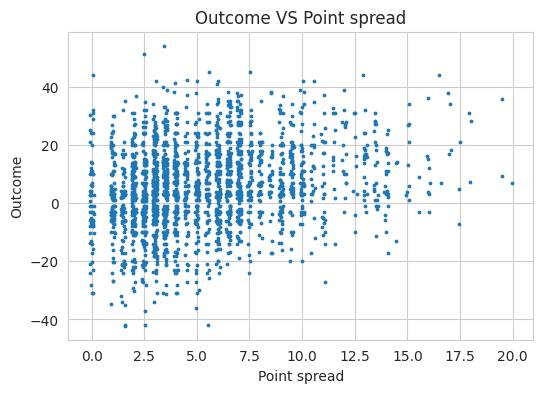

Number of games in dataset = 2240


In [4]:
outcome = np.array(data['favorite'] - data['underdog']) 
point_spread = np.array(data['spread'])

plt.figure(figsize=(6,4))
plt.scatter(point_spread +  0.2*np.random.rand((point_spread.shape[0])) - 0.1,
            outcome + 0.4*np.random.rand((outcome.shape[0])) - 0.2, s=3)
plt.xlabel('Point spread')
plt.ylabel('Outcome')
plt.title('Outcome VS Point spread')
plt.show()
print('Number of games in dataset = ' + str(len(outcome)))

## Assigning probabilities based on observed frequencies

It is of interest to assign probabilities to particular events. A first and natural approach can be to rely on the data that's been gathered to obtain empirical estimates.

**1) Compute:**

- **P1 = Pr(Favorite wins)**
- **P2 = Pr(Favorite wins | point spread = 3.5)**
- **P3 = Pr(Favorite wins by more than the point spread)**
- **P4 = Pr(Favorite wins by more than the point spread | point spread = 3.5)**

We will consider a tied game as one-half win and one-half loss. We will also ignore games without any favorite (point spread = 0)

In [5]:
n_favorite_wins = 0
for out, ps in zip(outcome, point_spread):
    if ps != 0 and out > 0 :
        n_favorite_wins+=1
    elif ps != 0 and out==0:
        n_favorite_wins+=0.5

#np.count_nonzero(point_spread): Counts only game in which there is a favorite

P1 = n_favorite_wins / np.count_nonzero(point_spread)

print('P1 = ' + str(P1))

P1 = 0.6646033929390188


In [6]:
i=0
j=0

for out, ps in zip(outcome, point_spread):
    if ps==3.5 and out>0:
        i+=1
    if ps==3.5:
        j+=1
        
P2 = i / j
print('P2 = ' + str(P2))

i=0
j=0

for out, ps in zip(outcome, point_spread):
    if ps>0 and out>ps:
        i+=1
    if ps!=0:
        j+=1

P3 = i / j    
print('P3 = ' + str(P3))

i=0
j=0

for out, ps in zip(outcome, point_spread):
    if ps==3.5 and out>ps:
        i+=1
    if ps==3.5:
        j+=1
        
P4 = i / j
print('P4 = ' + str(P4))

P2 = 0.6120218579234973
P3 = 0.48234754699679044
P4 = 0.5027322404371585


Most of these probabilities seem reasonable as they are based on the knowledge of football fans.

**2) Compute the following probabilities and comment the results: **

- **P5 = Pr(Favorite wins | point spread = 8.5)**
- **P6 = Pr(Favorite wins | point spread = 9)**

In [7]:
i=0
j=0

for out, ps in zip(outcome, point_spread):
    if ps==8.5 and out>0:
        i+=1
    if ps==8.5:
        j+=1
        
P5 = i / j
print('Number of wins of 8.5-point favorite: ' + str(i))
print('Number of games with 8.5-point  favorite: ' +str(j))
print('P5 = ' + str(P5))

i=0
j=0

for out, ps in zip(outcome, point_spread):
    if ps==9 and out>0:
        i+=1
    if ps==9:
        j+=1
        
P6 = i / j
print('Number of wins of 9-point favorite: ' + str(i))
print('Number of games with 9-point favorite: ' +str(j))
print('P6 = ' + str(P6))

Number of wins of 8.5-point favorite: 22
Number of games with 8.5-point  favorite: 27
P5 = 0.8148148148148148
Number of wins of 9-point favorite: 48
Number of games with 9-point favorite: 66
P6 = 0.7272727272727273


These probabilities tell us that a 8.5-point favorite is more likely to win than a 9-point favorite, which is counterintuitive. This is due to the small sample size of games with 8.5-point favorites. This limitation in probabilities assignements based on observed frequencies motivates the use of parametric models.

## A parametric model for the difference between outcome and point spread

The graph belows shows the difference between a game outcome and the point spread, plotted against the point spread.
Let's denote by y the outcome of a game and x its point spread.

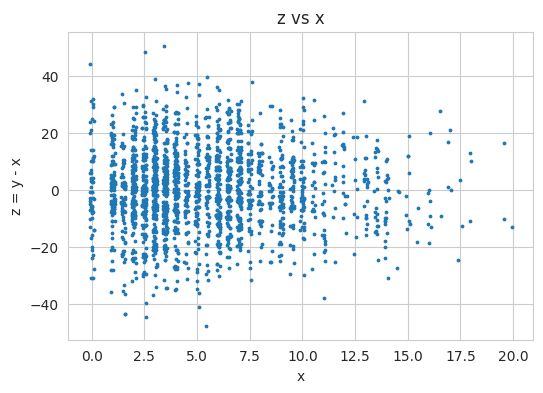

In [8]:
y = np.array(data['favorite'] - data['underdog'])
x = np.array(data['spread'])
z = y - x
plt.figure(figsize=(6,4))
plt.scatter(x +  0.2*np.random.rand((x.shape[0])) - 0.1, 
            z + 0.4*np.random.rand((z.shape[0])) - 0.2, s=3)

plt.xlabel('x')
plt.ylabel('z = y - x')
plt.title('z vs x')
plt.show()

**3) Plot the histogram of z, and the approximated Gaussian distribution of z|x.**

Sample mean = 0.22589285714285715
Sample std dev = 13.687140377113334


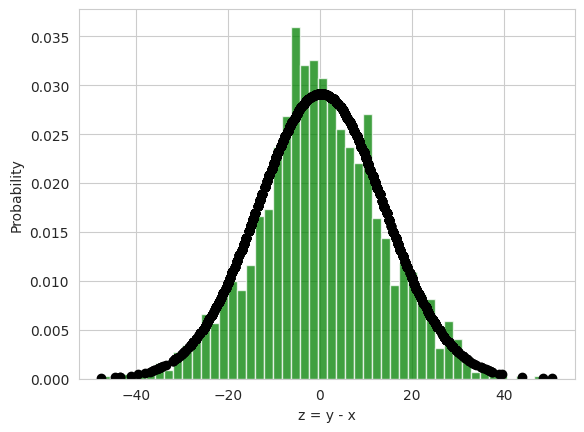

In [9]:
from scipy.stats import norm
sample_mean = np.mean(z)
sample_std_dev = np.std(z)
print("Sample mean = " + str(sample_mean))
print("Sample std dev = " + str(sample_std_dev))
dist = norm(loc=sample_mean, scale=sample_std_dev)
#plotting histogram and approximated Gaussian
plt.figure()
n, bins, patches = plt.hist(z, 50, density=True, facecolor='g', alpha=0.75)
plt.scatter(z, dist.pdf(z), color='black')

plt.xlabel('z = y - x')
plt.ylabel('Probability')
plt.grid(True)

plt.show()

The plot of z vs x suggests that it may be reasonable to model the distribution of z as independent of x. The histogram above shows the empirical distribution of z with a fitted normal distribution plotted over it. This graph suggests that it may be acceptable to approximate the distribution of the random variable z as a Normal distribution of mean $\mu = 0.22$ and standard deviation of $\sigma = 13.7$. For the rest of this exercise, we will assume z to follow a Gaussian distribution with these sample mean and standard deviation, and to be independent of x. So we can write: $z|x \sim \mathcal{N}(\mu, \sigma^{2})$. 
<br>
<br>
This model is not perfect as it does not exactly fit the data, and describes continuous-valued quantites while game scores or point-spreads or discrete. However, such a model provides an approximation that can be used to assign probabilities to events. Indeed:

P(y > 0 | x) = P(z+x > 0 | x) = P(z > -x | x) = 1 - P(z < -x | x)

As z follows a Gaussian distribution, we can easily compute its Cumulative Distribution Function (CDF).

**4) Making use of the approximated distribution of z|x, compute the following probabilities:**

- **P7 = Pr(Favorite wins | point spread = 3.5)**
- **P8 = Pr(Favorite wins | point spread = 8.5)**
- **P9 = Pr(Favorite wins | point spread = 9)**

We derive the calculation for P7:

$$\textrm{P7} =  \textrm{Pr(Favorite wins | point spread} = 3.5) = \textrm{Pr}(y > 0| x=3.5) = \textrm{Pr}(z+x>0|x=3.5) = \textrm{Pr}(z>-x | x=3.5) = 1-\textrm{Pr}(z<-x|x=3.5).$$

In [10]:
P7 = 1 - dist.cdf(-3.5)
P8 = 1 - dist.cdf(-8.5)
P9 = 1 - dist.cdf(-9)

print("P7 = " + str(P7))
print("P8 = " + str(P8))
print("P9 = " + str(P9))

P7 = 0.6072729920461126
P8 = 0.7381085032989834
P9 = 0.7498619993437082


We see that the probability for a 3.5-point favorite agrees with the empirical value given earlier,
while the probabilities for 8.5- and 9-point favorites make more sense than the empirical values derived before.

# Posterior inference (Bayesian Data Analysis, Gelman et al, Chapter 2)

This exercise illustrates how to do posterior inference using standard probability distributions introduced in the class.

Suppose you have a Beta(4,4) prior distribution on the probability $\theta$ that a coin will yield a "head" when spun in a specified manner. The coin is independently spun ten times, and "heads" appear fewer than 3 times. You don't know how many heads were seen, but only that their number is less than 3. We will denote by y the random variable giving the number of heads obtained after the 10 throws.

**1) Write the prior probability distribution of $\theta$ and the conditional y|$\theta$.**

$\theta$: Probability that a coin will yield a "head", $p(\theta) \propto \theta^{3}(1-\theta)^{3}.$

y: Random variable giving the number of heads over the n=10 independent throws, $p(y=k|\theta) = \binom{n}{k}\theta^{k}(1-\theta)^{n-k}.$

**2) Write the data likelihood.**

$$
\begin{align}
p(y<3|\theta) = p(y=0|\theta) + p(y=1|\theta) + p(y=2|\theta) = (1-\theta)^{10} + 10\theta(1-\theta)^{9} + 45\theta^{2}(1-\theta)^{8}
\end{align}
$$

**3) Calculate the posterior density of $\theta$ (up to a constant).**

We want to update our knowledge on the probability $\theta$ to get a "head" knowing that over 10 throws there were less than 3 heads. In other words, we want to infer the quantity: $p(\theta|y<3)$. By simply making use of the Bayes' rule we can write $p(\theta|y<3) \propto p(y<3|\theta)p(\theta)$, which gives:

$$
\begin{align}
p(\theta|y<3) = \theta^{3}(1-\theta)^{13} + 10\theta^{4}(1-\theta)^{12} + 45\theta^{5}(1-\theta)^{11}
\end{align}
$$

**4) Plot the posterior distribution of $\theta$ (up to a constant).**

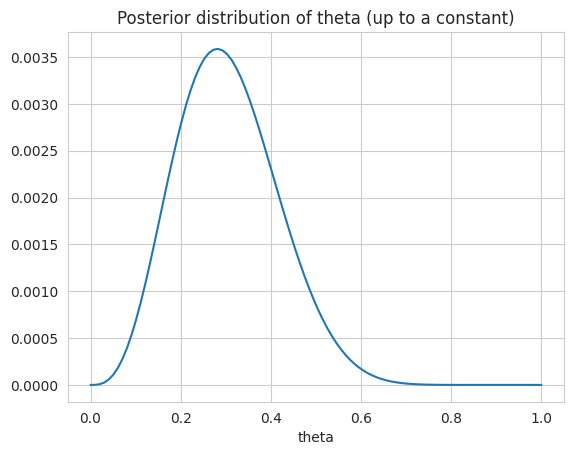

In [11]:
theta = np.linspace(0,1,100)
posterior_theta = theta**3*(1-theta)**13 + 10*theta**4*(1- theta)**12 + 45*theta**5*(1 - theta)**11

plt.figure()
plt.plot(theta, posterior_theta)
plt.xlabel("theta")
plt.title("Posterior distribution of theta (up to a constant)")
plt.show()

# Predictive prior distribution (Bayesian Data Analysis, Gelman et al, Chapter 2)

In this exercise, we show how we can incorporate all the information we have about the parameters of an experiment, in order to derive a predictive prior over the results of this experiement.

Let y be the number of 6's in 1000 independent rolls of a particular real die, which may be unfair. Let $\theta$ be the probability that the die lands on 6. We assume the following prior distribution for $\theta$:

$$
\begin{align}
Pr(\theta = \frac{1}{12}) & = 0.25 \\
Pr(\theta = \frac{1}{6}) & = 0.5 \\
Pr(\theta = \frac{1}{4}) & = 0.25.
\end{align}
$$

**1) Using the normal approximation, give the conditional distribution p(y|$\theta$).**

In order to approximate p(y|$\theta$) by a normal distribution we need to estimate its mean and variance.
We know that the experiment consists in 1000 independent rolls of the dice, so we could model p(y|$\theta$) by a binomial distribution. This distribution has a mean $\mu = n*\theta$, where n is the number of trials and a variance $\sigma^{2} = n*\theta(1-\theta)$. Therefore we can compute estimates of the mean and variance of y for the different values of $\theta$. In the case of $\theta$ = 0.25 for instance, we would have $\mu = 1000 * 0.25 = 250$, and $\sigma^{2} = 1000 * 0.25 * 0.75 = 188$. So we obtain, p(y|$\theta$=0.25) $\sim \mathcal{N}(250, 188)$.

**2) Give an approximate prior distribution for p(y) and plot it.**

Using the law of total probability, the prior distribution p(y) can be written:

$$
\begin{align}
p(y) = \sum_i p(y, \theta = p_i) = \sum_i p(y|\theta = p_i)p(\theta = p_i)
\end{align}
$$

Making use of the previous result we can compute approximate distributions for the different values of $\theta$.
The approximate prior predictive distribution for y is:

$$
\begin{align}
p(y) = \frac{1}{4}\mathcal{N}(83 ; 76) + \frac{1}{2}\mathcal{N}(167 ; 139) + \frac{1}{4}\mathcal{N}(250 ; 188)
\end{align}
$$

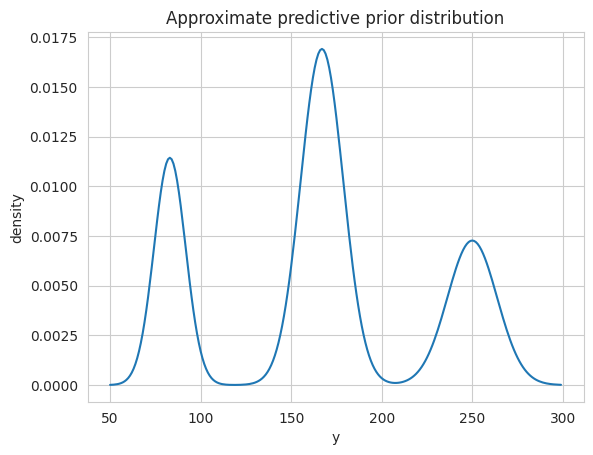

In [12]:
y = np.arange(50,300)
pred_prior_y = 0.25*norm.pdf(y, 83, np.sqrt(76)) + 0.5*norm.pdf(y, 167, np.sqrt(139)) + 0.25*norm.pdf(y, 250, np.sqrt(188))

plt.figure()
plt.plot(y, pred_prior_y)
plt.xlabel('y')
plt.ylabel('density')
plt.title('Approximate predictive prior distribution')
plt.show()

**3) Give approximate 5%, 25%, 50%, 75%, 95% points for the distribution of y.**

The prior predicitve distribution of y is a sum of three Gaussian distributions. Moreover, we can see on the plot above that there is almost no overlap between them. So we can consider that 1/4 of the distribution is in the first hump, 1/2 in the second one, and 1/4 in the last one. We introduce the following probability distributions: $y_1 \sim \mathcal{N}(\mu = 83, \sigma^2 = 76)$, $y_2 \sim \mathcal{N}(\mu = 167, \sigma^2 = 139)$, $y_3 \sim \mathcal{N}(\mu = 250,\sigma^2 = 188)$.

We also recall that, if we consider a random variable X with a CDF $F_X$, the $\alpha$% points for the distribution of X is defined by:

$$P(X < x) = \alpha \iff F_X(x) = \alpha \iff x = F_{X}^{-1}(\alpha). $$

Relying on this, we observe that the 5% points for y are completely contained in the first hump. However this hump represents only 1/4 of the data. Therefore, the 5% points for y are given by the 20% points of $y_1$.

In [13]:
dist1 = norm(83, np.sqrt(76))
five_percent_points = dist1.ppf(0.20)
print("5% points = " + str(np.rint(five_percent_points)))

5% points = 76.0


We know that the first hump contains 25% percent of the distribution of y. Therefore, the 25% points are in between the first and second humps, which would be approximately 120 on the graph. 

The second hump contains 1/2 of the distribution of y so the 50% points is given by its mean 167. 

The last hump contains 1/4 of the distribution, so the 75% points is in between the second and third hump, which is approximately 207.

 Finally the last hump contains the last 25% of the distribution. Before the hump we have 75% of the distribution of y, and in order to reach 95% we will need the 20% remaining which can be completely determined by y_3. However this distribution represents only 1/4 of y so we will need to determine its 80% points.  

In [14]:
dist3 = norm(250, np.sqrt(188))
ninety_five_percent_points = dist3.ppf(0.80)
print("95% points = " + str(np.rint(ninety_five_percent_points)))

95% points = 262.0
